In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')



In [19]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [20]:
df = pd.DataFrame(iris_data.data)
df.columns = iris_data.feature_names
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df.shape

(150, 4)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [23]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


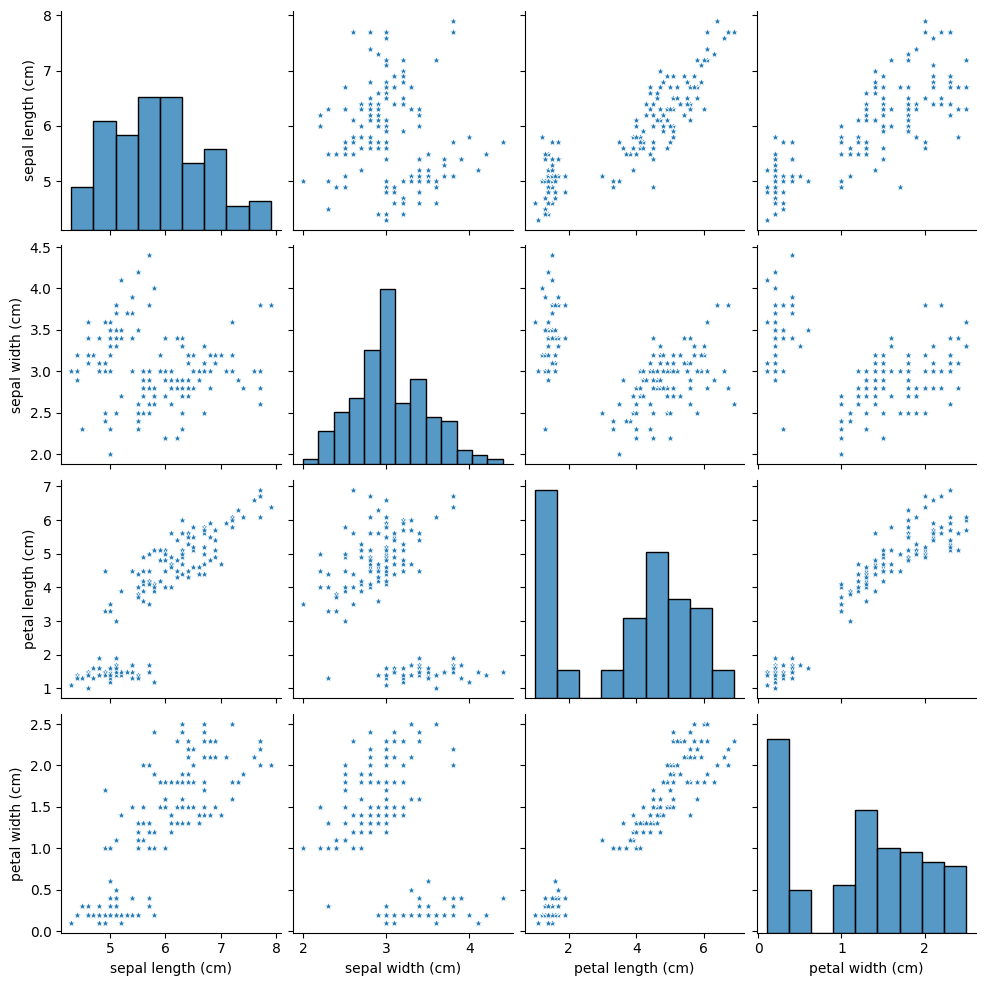

In [26]:
sns.pairplot(df, markers='*')
plt.show()

Finding correlation

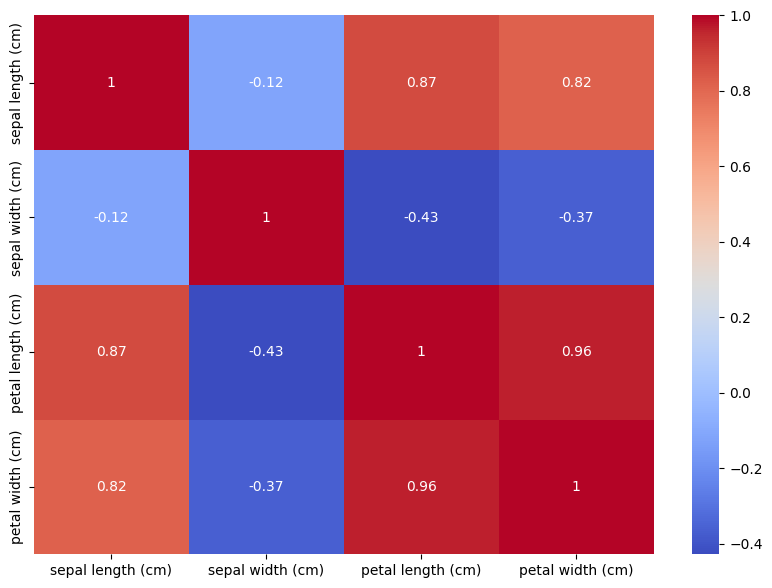

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

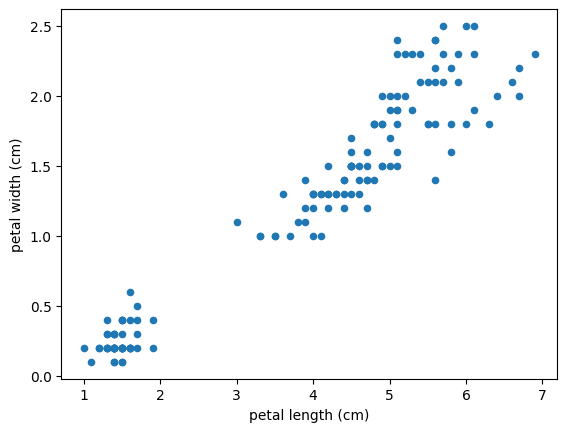

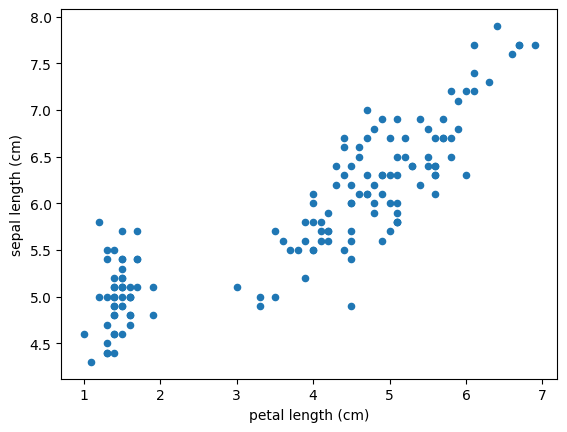

In [30]:
df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)')
df.plot(kind='scatter', x='petal length (cm)', y='sepal length (cm)')
plt.show()

Implementing KMeans Clustering on the data

Text(0, 0.5, 'Sum of Squared Distances within Clusters')

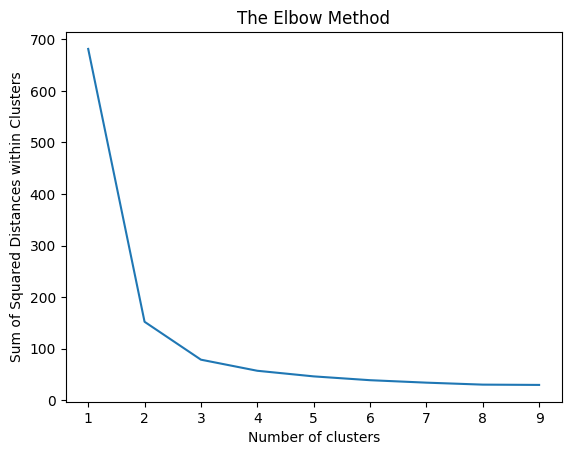

In [34]:
wss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)

plt.plot(range(1,10), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances within Clusters')

Finding number of clusters using Silhouette Method

In [35]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    print(f'Silhouette Score for {i} clusters: {silhouette_score(df, kmeans.labels_)}')

Silhouette Score for 2 clusters: 0.6810461692117462
Silhouette Score for 3 clusters: 0.5511916046195919
Silhouette Score for 4 clusters: 0.49764331793219224
Silhouette Score for 5 clusters: 0.49308040671935205
Silhouette Score for 6 clusters: 0.36784649847122436
Silhouette Score for 7 clusters: 0.35429788771988485
Silhouette Score for 8 clusters: 0.3446797218056193
Silhouette Score for 9 clusters: 0.3155887853389763


Text(0, 0.5, 'Silhouette Score')

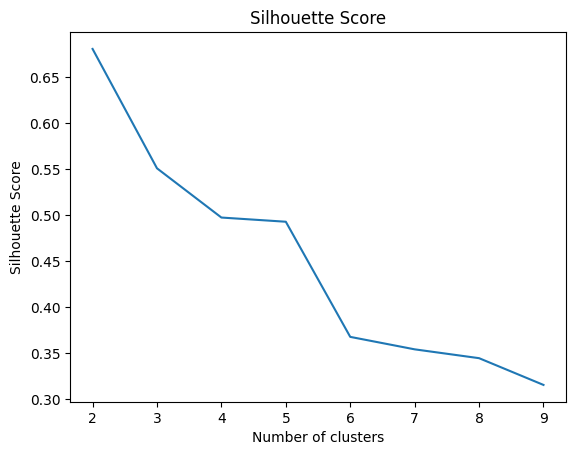

In [37]:
silhouette_scores = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

plt.plot(range(2,10), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

Standardizing Data

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
x = scaler.fit_transform(df)

In [42]:
# best was 2 clusters, picking next best is 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y = kmeans.fit_predict(x)
unique_labels = np.unique(y)

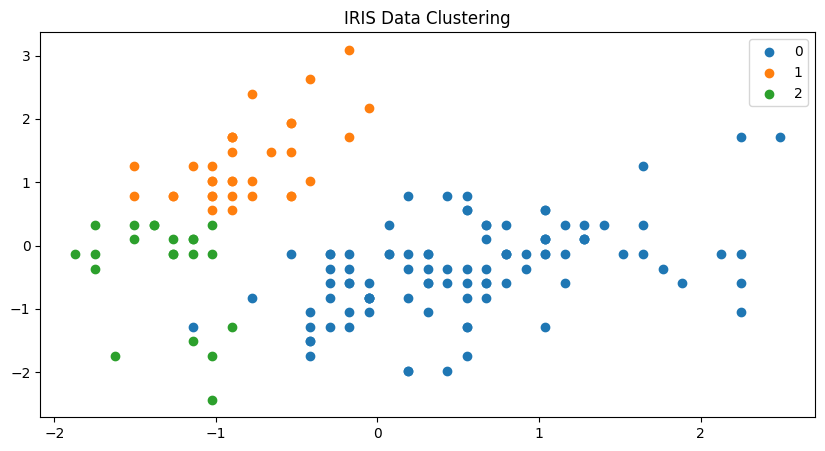

In [45]:
plt.figure(figsize=(10, 5))
for i in unique_labels:
    plt.scatter(x[y == i , 0] , x[y == i , 1] , label = i)
plt.title('IRIS Data Clustering')
plt.legend()